In [1]:
import boto3
import pandas as pd
import pyarrow.parquet as pq
import s3fs

In [2]:
!pip install --upgrade s3fs

  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.2.0
    Uninstalling fsspec-2025.2.0:
      Successfully uninstalled fsspec-2025.2.0
  Attempting uninstall: s3fs
    Found existing installation: s3fs 0.4.2
    Uninstalling s3fs-0.4.2:
      Successfully uninstalled s3fs-0.4.2


In [3]:
!pip install "s3fs>=2022.1.0"

In [5]:
# Load parquet file directly from S3
s3_path = 's3://raw-data-bitcoin/bitcoin_cleaned_data/20250316_033643_00015_zb83s_8e7bb85c-14bb-4651-90fb-6c419f922ba1'

# Read the parquet file
df = pd.read_parquet(s3_path, engine='pyarrow')

# Display first few rows
print(df.head())

                 date      open      high       low     close     volume
0 2021-01-07 17:49:00  39561.22  39561.23  39525.45  39551.56  32.372589
1 2021-01-07 17:50:00  39551.56  39555.89  39482.05  39498.36  43.793211
2 2021-01-07 17:51:00  39498.36  39634.00  39490.44  39627.96  72.359485
3 2021-01-07 17:52:00  39627.94  39641.44  39582.69  39599.99  57.512660
4 2021-01-07 17:53:00  39600.00  39623.45  39560.21  39561.22  39.779550


In [6]:
print(df.shape)

(1000000, 6)


In [7]:
print(df.dtypes)

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume           float64
dtype: object


In [8]:
print(df.describe())

                 open            high             low           close  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean     38831.434267    38857.843997    38805.171742    38831.419186   
std      13352.984933    13361.010538    13344.668469    13353.001821   
min      15513.840000    15544.470000    15476.000000    15513.840000   
25%      29129.642500    29145.980000    29111.000000    29129.610000   
50%      39295.390000    39325.000000    39264.020000    39295.315000   
75%      48323.797500    48356.382500    48291.520000    48324.052500   
max      69000.000000    69000.000000    68786.700000    69000.000000   

               volume  
count  1000000.000000  
mean        72.229779  
std        110.952187  
min          0.000000  
25%         18.393755  
50%         36.426851  
75%         81.161105  
max       4448.796350  


In [9]:
print(df.isnull().sum())

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [10]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


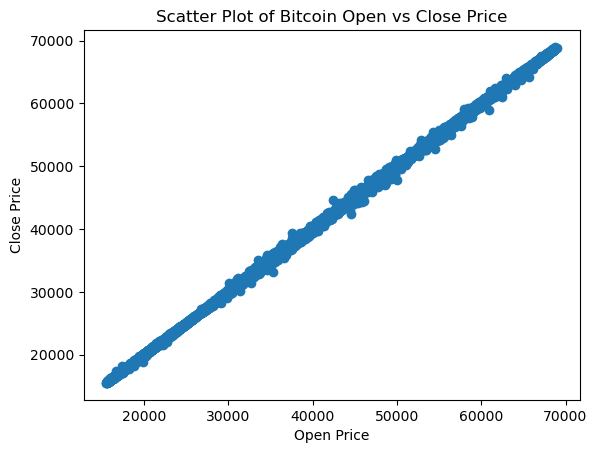

In [11]:
plt.scatter(df['open'], df['close'])  # Replace 'open' and 'close' with your columns
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Scatter Plot of Bitcoin Open vs Close Price')
plt.show()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [15]:
df = df.dropna()

In [16]:
# For now, using just open, high, low, and volume to predict close price
X = df[['open', 'high', 'low', 'volume']]
y = df['close']

# Normalize the features (very important for linear regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 20.532067702237494


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


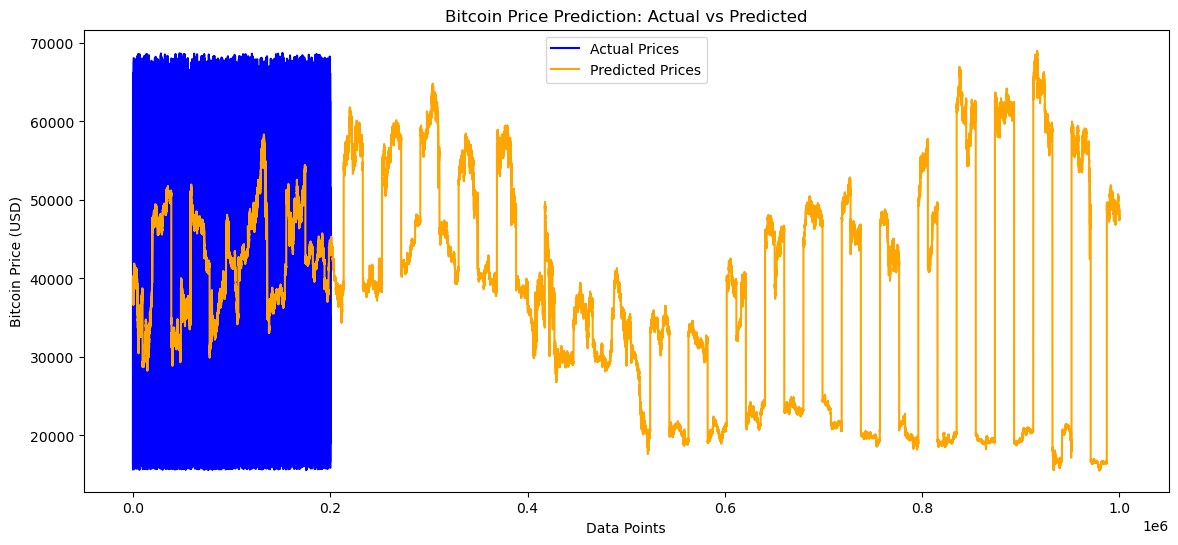

In [21]:
# Visualize the predictions vs actual values
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='orange')
plt.title('Bitcoin Price Prediction: Actual vs Predicted')
plt.xlabel('Data Points')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()